# 2020-02-17 Exam: Association Rules

The solution must be produced as a Python Notebook.
The notebook must include appropriate comments and must operate as follows:
1. Read a transactions database in sparse format from a txt file into a list of lists. The file
contains one transaction per line, each line has a variable number of items, separated by a
separator. The external list will have a list for each transaction, each transaction is a list of
items. Show the first two transactions (3 points)
2. Encode the list of lists into a binary representation and transform it into a dataframe whose
columns are the items show the head of that dataframe  (2 points)
3. Find a value of min_support such that the apriori algorithm generates at least 8 frequent
itemsets with at least 2 items. Output the result with the message below (5 points)
4. Find the minimum metric threshold such that at least 10 association rules are extracted
from the frequent itemsets found (5 points)
5. Print the first 10 rules found, sorted by descending confidence and support (3 points)
6. Plot confidence and support for all the sorted rules found (3 points)
7. Scatter plot the rules by confidence and support, labelling the points with the index value of
the corresponding rule (3 points)


Quality of the code (6pt):
1. The python cells must be preceded by appropriate comments
2. Useless cells and pieces of code will be penalised
3. Naming style of variables must be uniform and in English
4. Bad indentation and messy code will be penalised

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

random_state = 42
url = 'online_retail_red.txt'

## 1. Read a transactions database in sparse format from a txt file into a list of lists. The file contains one transaction per line, each line has a variable number of items, separated by a separator. The external list will have a list for each transaction, each transaction is a list of items. Show the first two transactions (3 points)

In [46]:
file = open(url, mode='r')
lim = 2

transactions = [line.strip('\n').split(';') for line in file.readlines()]
print('First {} transactions:'.format(lim))
i = 0
while i < lim: 
    print('[{}] {}'.format(i, transactions[i]))
    i+=1


First 2 transactions:
[0] ['CREAM CUPID HEARTS COAT HANGER', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN']
[1] ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK']


## 2. Encode the list of lists into a binary representation and transform it into a dataframe whose columns are the items show the head of that dataframe  (2 points)


In [47]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)

df = pd.DataFrame(transactions_encoded.astype(int), columns=encoder.columns_)
df.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items. Output the result with the message below (5 points)

In [48]:
from mlxtend.frequent_patterns import apriori

min_itemsets = 8
min_items_in_itemset = 2

min_support = 0
support_range = np.arange(0.1, 0.01, -0.01)

for support in support_range:
    print('Trying support: {:.2f}...'.format(support))
    frequent_itemsets = apriori(df, support, use_colnames=True)
    
    num_found = sum(len(itemset) >= min_items_in_itemset for itemset in frequent_itemsets.itemsets)

    if num_found >= min_itemsets:
        min_support = support
        break

if min_support == 0:
    print('No itemset found! Change thresholds')
else:
    print('Selected support: {:.2f}, which produced {} itemsets, {} of which with more than {} items'.format(min_support, len(frequent_itemsets), num_found, min_items_in_itemset))

Trying support: 0.10...
Trying support: 0.09...
Trying support: 0.08...
Trying support: 0.07...
Trying support: 0.06...
Trying support: 0.05...
Trying support: 0.04...
Trying support: 0.03...
Selected support: 0.03, which produced 148 itemsets, 12 of which with more than 2 items


## 4. Find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points)

use "confidence" as metric and output the line below:

Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n

In [49]:
from mlxtend.frequent_patterns import association_rules

metric_threshold_range = np.arange(1, 0.01, -0.01)
min_association_rules = 10
association_rules_found = 0
min_metric_threshold = 0

for metric_value in metric_threshold_range:
    print('Trying metric value: {:.2f}...'.format(metric_value))
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=metric_value)
    
    if len(rules) > min_association_rules:
        association_rules_found = len(rules)
        min_metric_threshold = metric_value
        break
    
if min_metric_threshold == 0:
    print('No association rules found! change threshold')
else:
    print('Metric: "confidence" - min_metric: {:.4f} - Number of rules: {}'.format(min_metric_threshold, association_rules_found))

Trying metric value: 1.00...
Trying metric value: 0.99...
Trying metric value: 0.98...
Trying metric value: 0.97...
Trying metric value: 0.96...
Trying metric value: 0.95...
Trying metric value: 0.94...
Trying metric value: 0.93...
Trying metric value: 0.92...
Trying metric value: 0.91...
Trying metric value: 0.90...
Trying metric value: 0.89...
Trying metric value: 0.88...
Trying metric value: 0.87...
Trying metric value: 0.86...
Trying metric value: 0.85...
Trying metric value: 0.84...
Trying metric value: 0.83...
Trying metric value: 0.82...
Trying metric value: 0.81...
Trying metric value: 0.80...
Trying metric value: 0.79...
Trying metric value: 0.78...
Trying metric value: 0.77...
Trying metric value: 0.76...
Trying metric value: 0.75...
Trying metric value: 0.74...
Trying metric value: 0.73...
Trying metric value: 0.72...
Trying metric value: 0.71...
Trying metric value: 0.70...
Trying metric value: 0.69...
Trying metric value: 0.68...
Trying metric value: 0.67...
Trying metric 

## 5. Print the first 10 rules found, sorted by descending confidence and support (3 points)

In [56]:
sorted_rules = rules.sort_values(by=['confidence','support'], ascending=False).reset_index(drop=True)
sorted_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039331,0.052255,0.032282,0.820768,15.707077,0.030226,5.287817,0.974669
1,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.039331,0.053541,0.030547,0.776671,14.505982,0.028441,4.237964,0.969182
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.052255,0.053541,0.039219,0.750535,14.017835,0.036421,3.793958,0.979865
3,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053541,0.052255,0.039219,0.732497,14.017835,0.036421,3.542939,0.981197
4,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041960,0.050241,0.030267,0.721333,14.357586,0.028159,3.408228,0.971098
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064843,0.108426,0.043919,0.677308,6.246751,0.036888,2.762927,0.898156
6,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.044758,0.062941,0.030100,0.672500,10.684680,0.027283,2.861250,0.948878
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049010,0.052031,0.031498,0.642694,12.352165,0.028948,2.653102,0.966406
8,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050912,0.108426,0.031890,0.626374,5.776988,0.026370,2.386273,0.871257
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.052255,0.039331,0.032282,0.617773,15.707077,0.030226,2.513347,0.987960


## 6. Plot confidence and support for all the sorted rules found (3 points)

<Axes: >

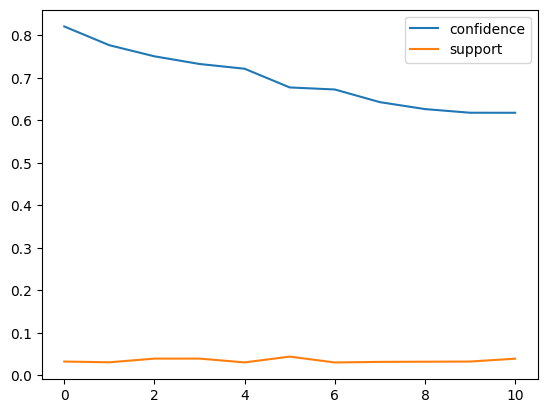

In [57]:
sorted_rules[['confidence','support']].plot()

## 7. Scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule (3 points)

<Axes: title={'center': 'Association Rules (dot proportional to Lift)'}, xlabel='confidence', ylabel='support'>

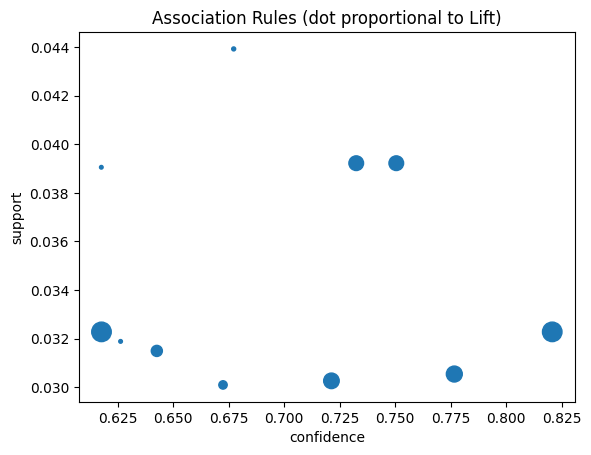

In [64]:
size_point = 1.4

rules.plot.scatter(x='confidence'
                 , y='support'
                 , s=[size_point**n for n in rules.lift]
                 , title='Association Rules (dot proportional to Lift)') 